## Clustering H1ESC cell-line feature data | Ascertaining Key Variables for the Hubs and Non-Hubs

#### Author: Shaurya Jauhari
#### Last Reviewed: December 28th, 2020

### Background

<p align = "justify"> This workflow is premised on the idea that with the clustering of the data on read-coverages (for the features), we'll be able to figure out the key variables that are truly representative of the Hubs or Non-Hubs, as defined by our previous analyses. </p>
<p align = "justify"> So, we began with a data matrix that held information about the reads associated with histone marks and protein-bindings, corresponding to our bin-intervals of 2Kb (genome-wide). From an initial analysis, we were able to classifiy such intervals as "Hubs" or "Non-Hubs". <i> Hubs </i> are those regions that interact at a distance of 1Mb or "Inf", as per the definitions in <a href= "https://doi.org/10.1093/database/baz162" >GREG</a>. </p> 

In [23]:
# --- Loading Data --- #
# --- From Logistic Regression --- #

classData <- read.table("./truePositives/h1escLR.txt", header = T)
featureData <- read.table("../../transcriptionFactoriesGREG/MachineLearning//data/H1ESCforML.txt", header = T)

# --- Removing Redundancy --- #

classDataUnique <- unique(classData)
featureDataUnique <- unique(featureData)

# --- Merging Data --- #

if(!require(dplyr)) install.packages(dplyr,
                                         repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/",
                                         dependencies = TRUE)
suppressPackageStartupMessages(library(dplyr))
one <- inner_join(classDataUnique, featureDataUnique, by = c("chr", "start", "end"))

# --- Applying Hierarchical Clustering --- #

distance <- dist(one[, - c(1:5, 19)], method = "euclidean")
cluster <- hclust(distance, method = "average")
plot(cluster, hang = -1, label = one$Prediction)

ERROR: Error: cannot allocate vector of size 3103.0 Gb


In [22]:
str(one)

'data.frame':	912667 obs. of  19 variables:
 $ chr       : Factor w/ 25 levels "chr1","chr10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ start     : int  1 2001 4001 6001 8001 10001 12001 14001 16001 18001 ...
 $ end       : int  2000 4000 6000 8000 10000 12000 14000 16000 18000 20000 ...
 $ Class.x   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ Prediction: Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ CTCF      : num  0 0 0 0 0 ...
 $ EP300     : num  0 0 0 0 0.223 ...
 $ H3K27me3  : num  0 0 0 0 0 ...
 $ H3K36me3  : num  0 0 0 0 0 ...
 $ H3K4me1   : num  0 0 0 0 0 ...
 $ H3K4me2   : num  0 0 0 0 0 ...
 $ H3K4me3   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ H3K9ac    : num  0 0 0 0 0 ...
 $ H3K9me3   : num  0 0 0 0 0 ...
 $ RAD21     : num  0 0 0 0 0 ...
 $ RNA.Seq   : num  0 0 0 0 0 ...
 $ RNAPol2   : num  0 0 0 0 0.0277 ...
 $ YY1       : num  0 0 0 0 0 ...
 $ Class.y   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...


The hierarchical clustering is sensitive to the extent of data, and didn't execute successfully. Let us try a different flavor; k-means clustering. But before that, let's look at the distribution of variables which holds clue to nature of different classes.

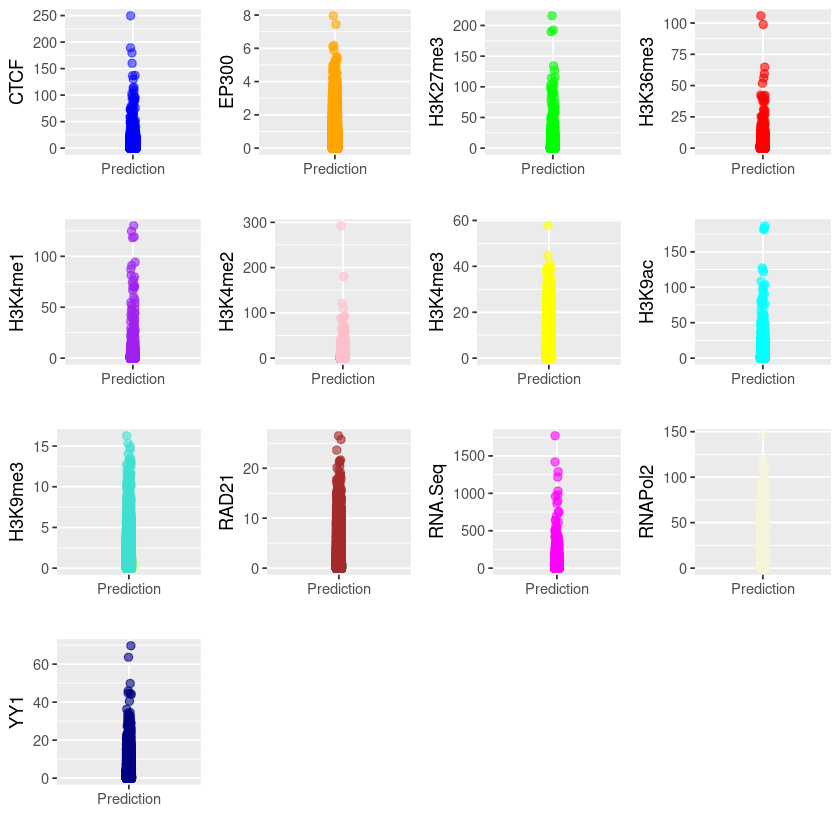

In [25]:
# --- K-Means Clustering --- #

requiredPackages <- c("tidyverse", "gridExtra")
newPackages <- requiredPackages[!(requiredPackages %in% installed.packages()[,"Package"])]
if(length(newPackages)) install.packages(newPackages,
                                         repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/",
                                         dependencies = TRUE)
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(gridExtra))

# --- Distribution of each variable --- #

plot1 <- one %>% 
  ggplot(aes(x = "Prediction", y = CTCF)) + 
  geom_jitter(width = .025, height = 0, size = 2, alpha = .5, color = "blue") +
  labs(x = "", y="CTCF")

plot2 <-  one %>%
  ggplot(aes(x = "Prediction", y = EP300)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "orange") +
  labs(x = "", y="EP300")

plot3 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K27me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "green") +
  labs(x = "", y="H3K27me3")

plot4 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K36me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "red") +
  labs(x = "", y="H3K36me3")

plot5 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K4me1)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "purple") +
  labs(x = "", y="H3K4me1")

plot6 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K4me2)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "pink") +
  labs(x = "", y="H3K4me2")

plot7 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K4me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "yellow") +
  labs(x = "", y="H3K4me3")

plot8 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K9ac)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "cyan") +
  labs(x = "", y="H3K9ac")

plot9 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K9me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "turquoise") +
  labs(x = "", y="H3K9me3")

plot10 <-  one %>%
  ggplot(aes(x = "Prediction", y = RAD21)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "brown") +
  labs(x = "", y="RAD21")

plot11 <-  one %>%
  ggplot(aes(x = "Prediction", y = RNA.Seq)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "magenta") +
  labs(x = "", y="RNA.Seq")

plot12 <-  one %>%
  ggplot(aes(x = "Prediction", y = RNAPol2)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "beige") +
  labs(x = "", y="RNAPol2")

plot13 <-  one %>%
  ggplot(aes(x = "Prediction", y = YY1)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "navy") +
  labs(x = "", y="YY1")


grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, plot9, plot10, plot11, plot12, plot13)

We can reflect that the variables are quite assymetrical to each others in terms of their values.  

In [26]:
summary(one)

      chr             start                end               Class.x      
 chr1   : 81804   Min.   :        1   Min.   :     2000   Hub    :  1415  
 chr2   : 77480   1st Qu.: 32324001   1st Qu.: 32326000   Non-Hub:911252  
 chrX   : 72882   Median : 67556001   Median : 67558000                   
 chr4   : 57509   Mean   : 80956851   Mean   : 80958850                   
 chr3   : 53132   3rd Qu.:117760001   3rd Qu.:117762000                   
 chr5   : 48118   Max.   :249249579   Max.   :249250621                   
 (Other):521742                                                           
   Prediction          CTCF              EP300            H3K27me3       
 Hub    :  1415   Min.   :  0.0000   Min.   :0.00000   Min.   :  0.0000  
 Non-Hub:911252   1st Qu.:  0.1621   1st Qu.:0.07436   1st Qu.:  0.1095  
                  Median :  0.3241   Median :0.37180   Median :  0.3286  
                  Mean   :  0.4864   Mean   :0.34642   Mean   :  0.3700  
                  3rd Qu.:  0.

Now, let us execute the k-means clustering algorithm with an abitrary value of 3 for <i> k </i>. It is known to us that there are just two classes that exist.

In [27]:
kmeans3 <- kmeans(one[, - c(1:5, 19)], centers = 3, nstart = 20)
cat("The within cluster sum of squares for this clustering is", (kmeans3$betweenss/kmeans3$totss)*100, "%")

The within cluster sum of squares for this clustering is 57.99831 %

The within cluster sum of squares is an important metric. It helps us determine how compact the clusters are, as in how similar are the elements of a cluster. The higher this percentage, the "cleaner" the clustering.

In [28]:
kmeans2 <- kmeans(one[, - c(1:5, 19)], centers = 2, nstart = 20)
cat("The within cluster sum of squares for this clustering is", (kmeans2$betweenss/kmeans2$totss)*100, "%")

The within cluster sum of squares for this clustering is 40.73112 %

Now the percentage has gone down to ~ 41 %. This run hasn't been any better.

<p align = "justify"> Understandably, it would be tedious to check for multiple values of <i> centers </i>, and we'll stick to the best estimate of 3 for now. Contrarily, we can explore another package, <a href = "https://github.com/o1iv3r/FeatureImpCluster" > FeatureImpCluster</a>, for eliciting the importance of variables. </p>

In [29]:
if(!require(devtools)) install.packages("devtools",
                                       dependencies = TRUE,
                                       repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/")
suppressPackageStartupMessages(library(devtools))

if(!require(FeatureImpCluster)) install_github("o1iv3r/FeatureImpCluster")
suppressPackageStartupMessages(library(FeatureImpCluster))

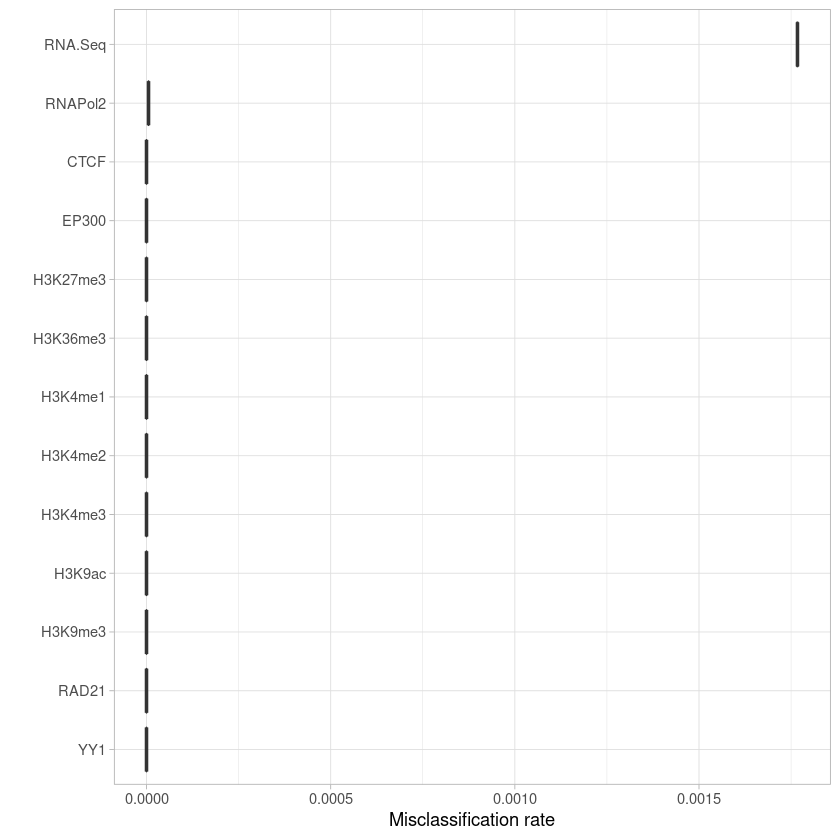

In [30]:
# --- Installing supporting package --- # 

if(!require(flexclust)) install.packages("flexclust",
                                         repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/",
                                         dependencies = TRUE)
suppressPackageStartupMessages(library(flexclust))

# --- Running Algorithm --- #

set.seed(10)
res <- kcca(one[, -c(1:5, 19)], k = 3)
resultFeatureImp <- FeatureImpCluster(res, as.data.table(one[, -c(1:5, 19)]))
plot(resultFeatureImp, color= "none")

<p align = "justify"> What <i> FeatureImpCluster </i> helps us determine is the variable importance, via computation of the <i> permutation misclassification rate </i>. This metric for a variable is <b> the number of wrong cluster assignments divided by the number of observations (rows) given a permutation of the feature </b>. The mean misclassification rate over all iterations is interpreted as variable importance. </p>

In [31]:
PermMisClassRate(res, as.data.table(one[, - c(1:5, 19)]), varName = "RNA.Seq")

[1] 0.001768443 0.001767348 0.001765156 0.001766252 0.001766252

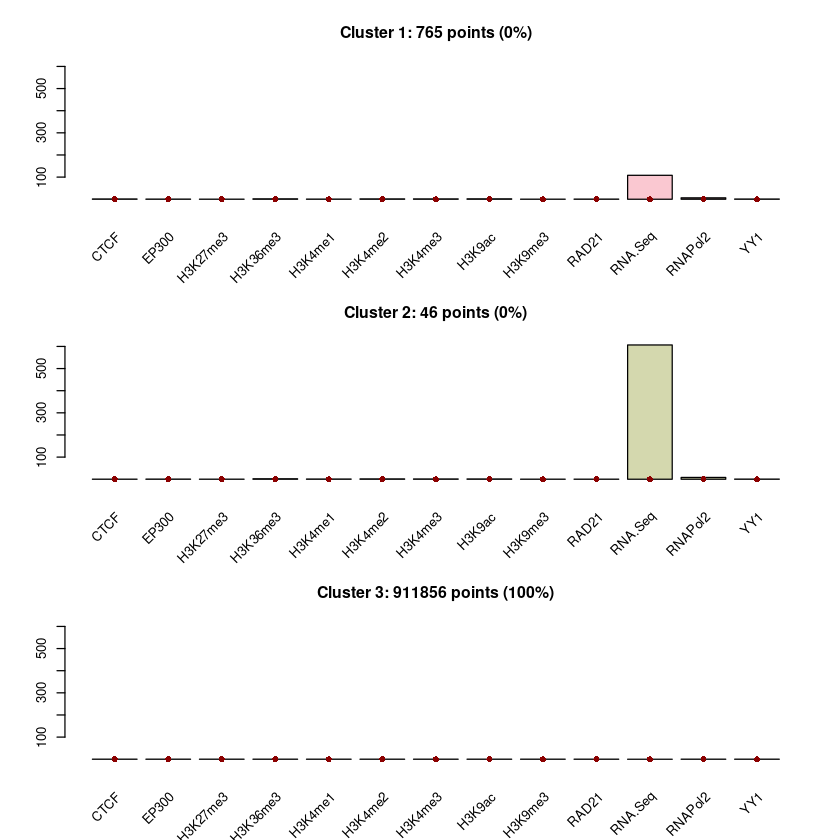

In [32]:
barplot(res)

<p align= "justify"> From the above plots, we can observe that <b>RNA.Seq</b> is the most crucial variable in determining the cluster-partitions, and we find it enriched in <i>Clusters 1 and 2</i>. There are also impressions of the mild expression of <b>RNAPol2</b>. However, in <i>Cluster 3</i>, we observe that all variables are silent. Ironically, this clusters also incubates majority of data.

### Verifying with the true positives from Random Forests

In [34]:
classDataRF <- read.table("./truePositives/h1escRF.txt", header = T)
classDataUniqueRF <- unique(classDataRF)

two <- inner_join(classDataUniqueRF, featureDataUnique, by = c("chr", "start", "end"))

In [35]:
str(two)

'data.frame':	1536086 obs. of  19 variables:
 $ chr       : Factor w/ 25 levels "chr1","chr10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ start     : int  1 2001 4001 6001 8001 10001 12001 14001 16001 18001 ...
 $ end       : int  2000 4000 6000 8000 10000 12000 14000 16000 18000 20000 ...
 $ Class.x   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ Prediction: Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ CTCF      : num  0 0 0 0 0 ...
 $ EP300     : num  0 0 0 0 0.223 ...
 $ H3K27me3  : num  0 0 0 0 0 ...
 $ H3K36me3  : num  0 0 0 0 0 ...
 $ H3K4me1   : num  0 0 0 0 0 ...
 $ H3K4me2   : num  0 0 0 0 0 ...
 $ H3K4me3   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ H3K9ac    : num  0 0 0 0 0 ...
 $ H3K9me3   : num  0 0 0 0 0 ...
 $ RAD21     : num  0 0 0 0 0 ...
 $ RNA.Seq   : num  0 0 0 0 0 ...
 $ RNAPol2   : num  0 0 0 0 0.0277 ...
 $ YY1       : num  0 0 0 0 0 ...
 $ Class.y   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...


As before, we'll consider some arbitrary number of cluster and check for the magnitude of within-cluster sum of squares. The one with the highest shall be chosen subsequently for further analysis. 

In [36]:
kmeans3_1 <- kmeans(two[, - c(1:5, 19)], centers = 3, nstart = 20, iter.max = 20) 
# increasing the value of iter.max from 10 (default) to 20, for dealing with convergence issues in the model.

cat("The within cluster sum of squares for this clustering is", (kmeans3_1$betweenss/kmeans3_1$totss)*100, "%")

The within cluster sum of squares for this clustering is 46.68239 %

In [37]:
kmeans2_1 <- kmeans(two[, - c(1:5, 19)], centers = 2, nstart = 20)
cat("The within cluster sum of squares for this clustering is", (kmeans2_1$betweenss/kmeans2_1$totss)*100, "%")

The within cluster sum of squares for this clustering is 31.94153 %

In [54]:
kmeans4 <- kmeans(two[, - c(1:5, 19)], centers = 4, nstart = 20, iter.max = 30)
cat("The within cluster sum of squares for this clustering is", (kmeans4$betweenss/kmeans4$totss)*100, "%")

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 76804300)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 76804300)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 76804300)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 76804300)”


The within cluster sum of squares for this clustering is 55.57877 %

In [42]:
kmeans5 <- kmeans(two[, - c(1:5, 19)], centers = 5, nstart = 20, iter.max = 30)
cat("The within cluster sum of squares for this clustering is", (kmeans5$betweenss/kmeans5$totss)*100, "%")

The within cluster sum of squares for this clustering is 61.36334 %

Out of these clustering runs, we find that the cleanest of groupings happen with 5 clusters. Despite, let's explore this further with 3 clusters.

In [44]:
# --- Running Algorithm --- #

set.seed(11)
res1 <- kcca(two[, -c(1:5, 19)], k = 3)
resultFeatureImp1 <- FeatureImpCluster(res1, as.data.table(two[, -c(1:5, 19)]))

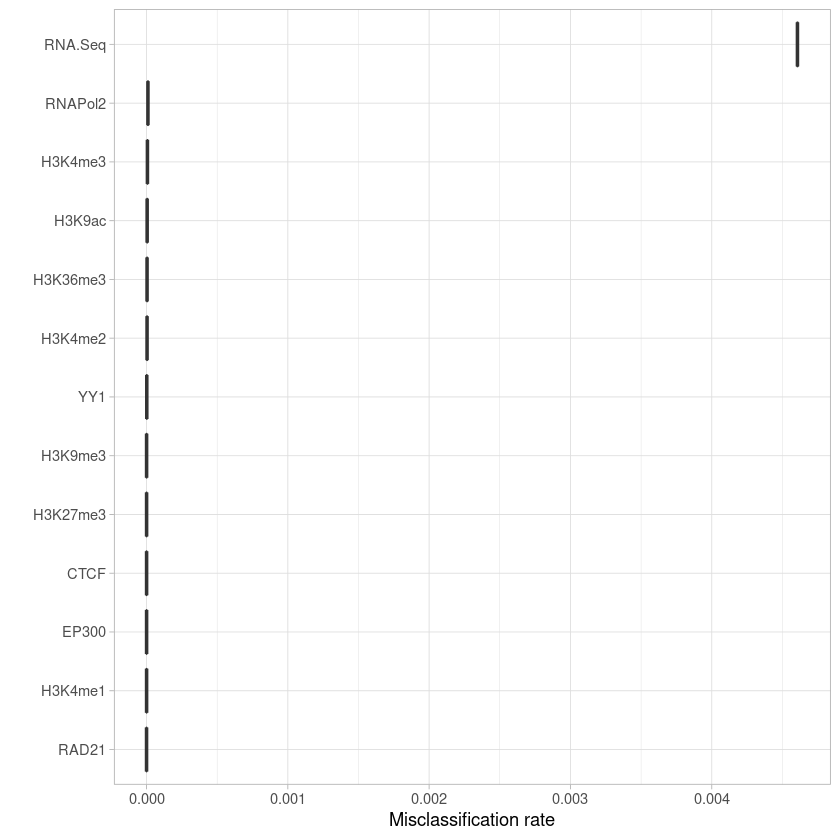

In [45]:
plot(resultFeatureImp1)

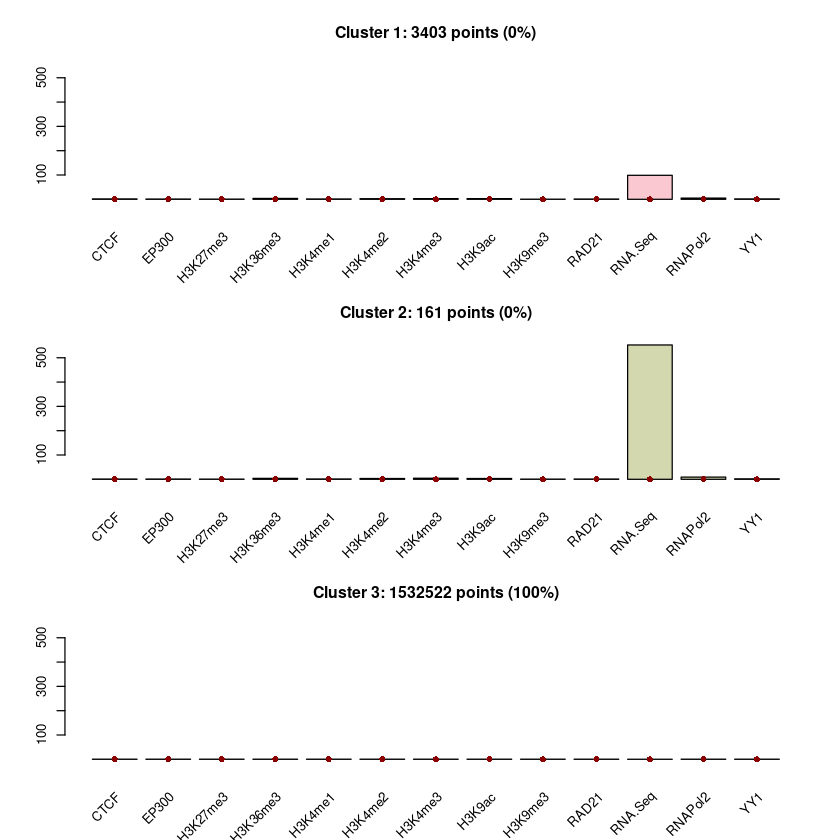

In [46]:
barplot(res1)

<p align = "justify"> <b>RNAPol2</b> is a key liner for the transcription factories. This marks active transcription and in the above scenario is witnessed to have mild shoots in the two clusters. The point to debate is that it is hinged over a very minuscle fraction of the total data, but still is! It could arguably be noted as a function of <i> Hubs </i>, while <i> Non-Hubs</i> are still manifesting the bulk of data. This is a pointer that could again be viable given the cardinality of the individual class distribution. </p>

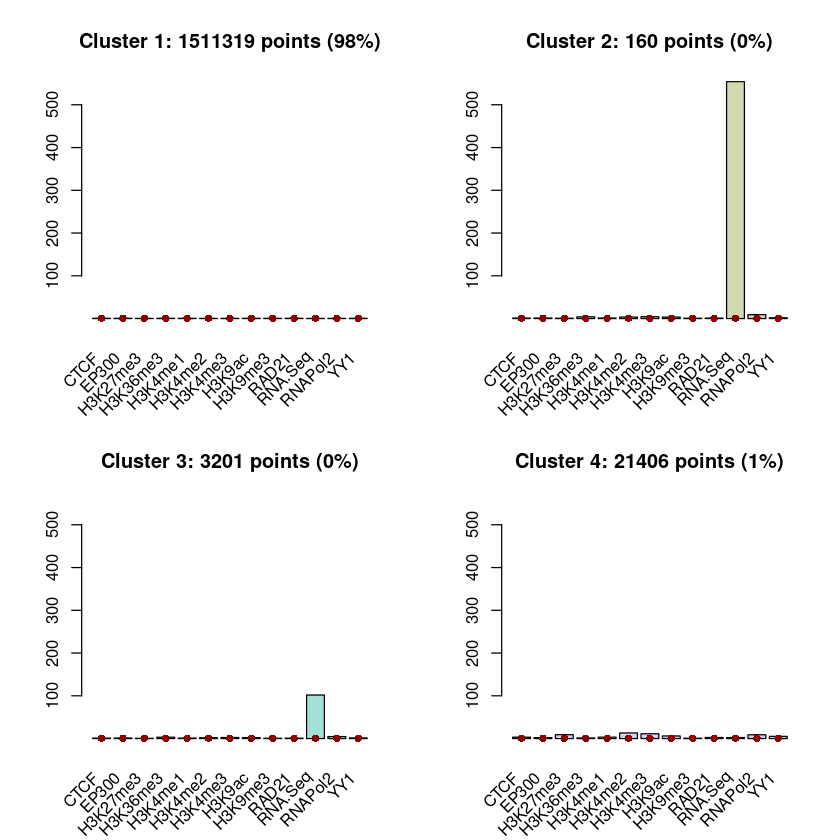

In [47]:
# --- Running Algorithm --- #
# --- 4 clusters --- #

set.seed(12)
res2 <- kcca(two[, -c(1:5, 19)], k = 4)
barplot(res2)

Cluster 1 could be deemed as a "dummy" cluster; we can't make anything out of it, despite it carrying roughly the whole of data. In Cluster 4 particularly, we discern bumps of H3K27me3, H3K4me2, H3K4me3, and RNAPol2, the latter three assumably representing transcriptional activation. Also, the peak for RNA.Seq (Cluster 2 and 3) is signifiying that there is transcription happening.    

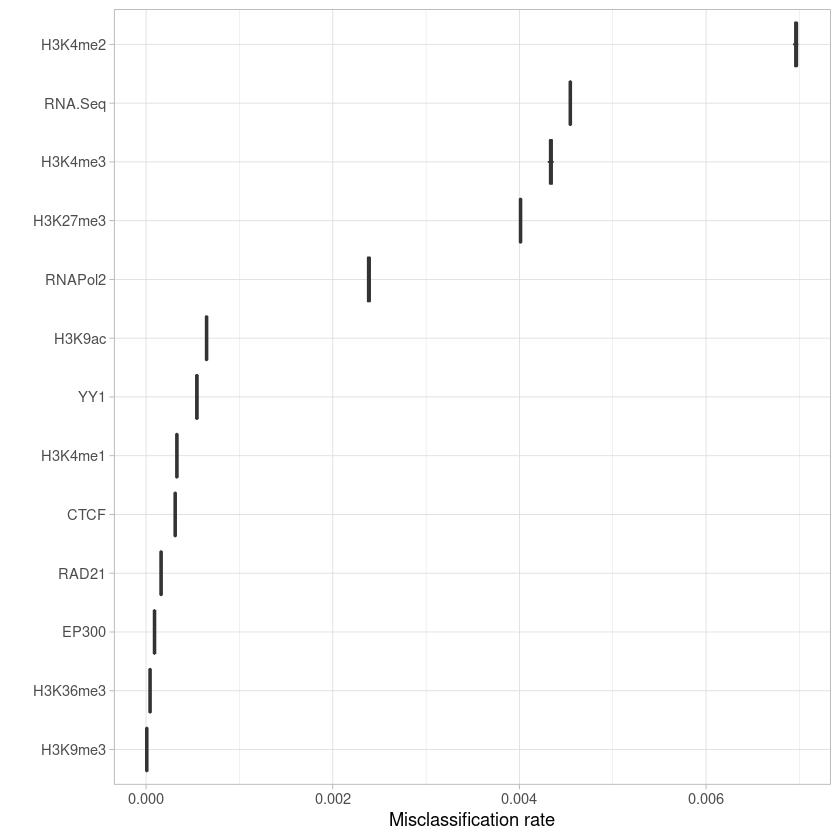

In [48]:
resultFeatureImp2 <- FeatureImpCluster(res2, as.data.table(two[, -c(1:5, 19)]))
plot(resultFeatureImp2)

<p align= "justify"> Again with 4 clusters, we can generally distill that <b> H3K4me2 </b>, <b> H3K4me3 </b>, <b> RNAPol2 </b>, and <b> H3K9ac </b> are important variables that decide on a "cleaner" clustering performance. These are also the ones that are key drivers of transcription machinery. </p> 

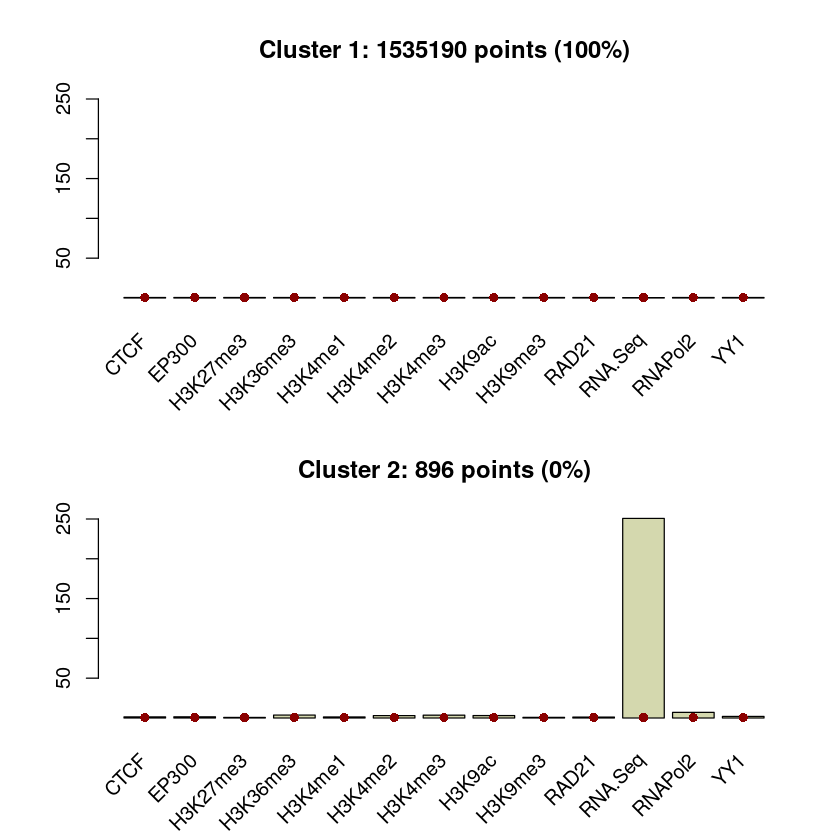

In [49]:
# --- Running Algorithm --- #
# --- 2 clusters --- #

set.seed(12)
res3 <- kcca(two[, -c(1:5, 19)], k = 2)
barplot(res3)

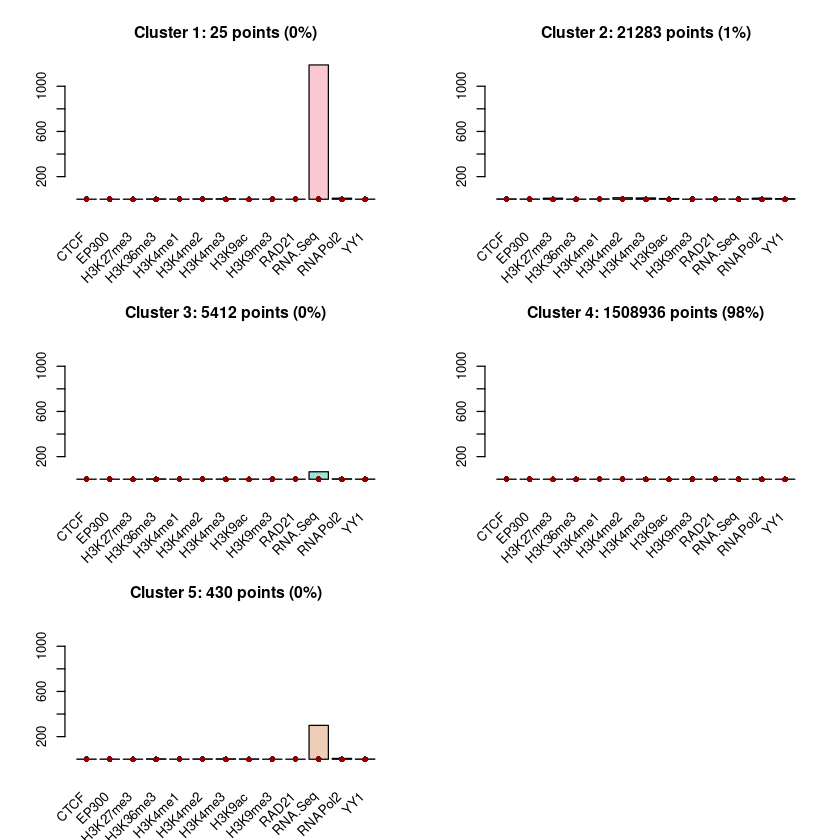

In [51]:
# --- Running Algorithm --- #
# --- 5 clusters --- #

set.seed(13)
res4 <- kcca(two[, -c(1:5, 19)], k = 5)
barplot(res4)

### Conclusion

<p align = "justify"> No feature variable apparently stands out as the key entity underlining the <i> Non-Hubs</i>, while <b>RNAPol2 </b>, <b>H3K4me2 </b>, <b>H3K4me3</b>, and <b>H3K9ac </b> are pertinent in highlighting <i> Hubs</i>, in the H1ESC cell-line data. </p> 

In [16]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] FeatureImpCluster_0.1.2 data.table_1.13.4       flexclust_1.4-0        
 [4] modeltools_0.2-23       lattice_0.20-41         devtools_2.3.2         
 [7] usethis_1.6.3           gridExtra_2.3           forcats_0.5.0          
[10] stringr_1.4.0           purrr_0.3.4             readr_1.3.1            
[13